# Chronic Kidney Disease - Prediction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [4]:
data.classification = data.classification.replace("ckd\t", "ckd")
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [5]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [6]:
data.drop('id', axis=1, inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [7]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# Imputing missing values
numerical_columns = ['age', "bp","sg","al","su","bgr",'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

data[numerical_columns].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      70
wc      105
rc      130
dtype: int64

In [9]:
# These columns has blanks which we have to remove
# pcv : '' 
# wc  : ''
# rc  : ''
# rc  : '\t?'
# pcv  : '\t?'
# pcv  : '\t43'
# wc  : '\t?'
# wc  : '\t6200'
# wc  : '\t8400'


# data['rc'].unique()

In [10]:
data['pcv'] = data['pcv'].replace('', '0')
data['rc'] = data['rc'].replace('', '0')
data['wc'] = data['wc'].replace('', '0')
data['pcv'] = data['pcv'].replace('\t?', '0')
data['rc'] = data['rc'].replace('\t?', '0')
data['wc'] = data['wc'].replace('\t?', '0')
data['pcv'] = data['pcv'].replace('\t43', '43')
data['wc'] = data['rc'].replace('\t6200', '6200')
data['wc'] = data['wc'].replace('\t8400', '8400')

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [12]:
data.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
categorical_columns = ['rbc', 'pc','pcc','ba', 'htn','dm','cad','appet','pe','ane']
data[categorical_columns].isnull().mean()*100

rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64

In [14]:
# for categorical data, we'll impute the most frequent values 
for i in categorical_columns:
    print(i, ": ", data[i].mode())

rbc :  0    normal
dtype: object
pc :  0    normal
dtype: object
pcc :  0    notpresent
dtype: object
ba :  0    notpresent
dtype: object
htn :  0    no
dtype: object
dm :  0    no
dtype: object
cad :  0    no
dtype: object
appet :  0    good
dtype: object
pe :  0    no
dtype: object
ane :  0    no
dtype: object


In [15]:
data['rbc'].fillna('normal', inplace=True)
data['pc'].fillna('normal', inplace=True)
data['pcc'].fillna('notpresent', inplace=True)
data['ba'].fillna('notpresent', inplace=True)
data['htn'].fillna('no', inplace=True)
data['dm'].fillna('no', inplace=True)
data['cad'].fillna('no', inplace=True)
data['appet'].fillna('good', inplace=True)
data['pe'].fillna('no', inplace=True)
data['ane'].fillna('no', inplace=True)

In [16]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,5.2,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,4.8,4.8,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,4.8,4.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,3.9,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,4.6,4.6,no,no,no,good,no,no,1


In [17]:
data['pcv']=data['pcv'].astype(int)
data['wc']=data['wc'].astype(int)
data['rc']=data['rc'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    flo

In [18]:
cat_mapping = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [19]:
data[categorical_columns] = data[categorical_columns].replace(cat_mapping)

In [20]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44,5,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,38,4,4.8,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31,4,4.8,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,3,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35,4,4.6,0,0,0,1,0,0,1


<AxesSubplot:>

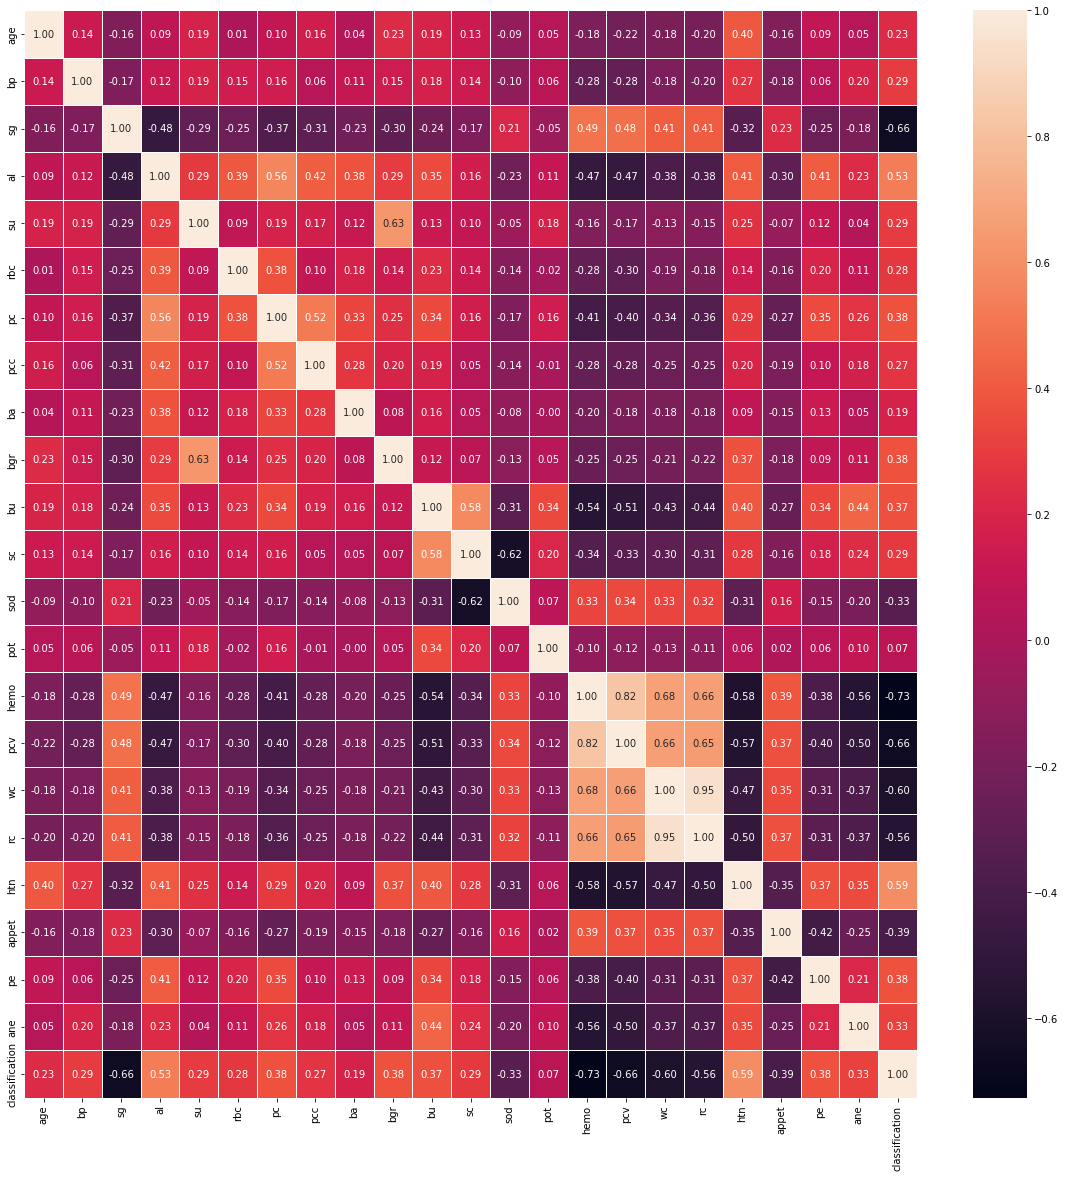

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [22]:
data.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,pcv,wc,rc,htn,appet,pe,ane,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,...,0.049399,-0.178308,-0.217809,-0.184042,-0.201624,0.395073,-0.156581,0.094772,0.052938,0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,...,0.063667,-0.279303,-0.275472,-0.177933,-0.204404,0.266901,-0.175054,0.056902,0.195134,0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,-0.299413,...,-0.052935,0.490699,0.477771,0.413369,0.410259,-0.323643,0.230975,-0.253803,-0.184155,-0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,...,0.107893,-0.474399,-0.470449,-0.379451,-0.380505,0.406057,-0.303145,0.411080,0.229556,0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,...,0.177396,-0.156807,-0.171769,-0.131218,-0.150707,0.254268,-0.069216,0.116442,0.042464,0.294555
rbc,0.014904,0.150384,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,...,-0.020473,-0.280996,-0.304883,-0.187304,-0.184167,0.140538,-0.160868,0.199285,0.107625,0.282642
pc,0.102286,0.156231,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,...,0.155434,-0.411707,-0.401164,-0.337003,-0.361003,0.291719,-0.274985,0.350227,0.260566,0.375154
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,...,-0.011416,-0.276645,-0.284348,-0.252113,-0.249233,0.195623,-0.189688,0.104356,0.175861,0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,...,-0.001944,-0.204860,-0.181339,-0.183256,-0.181706,0.089046,-0.149126,0.134732,0.052208,0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,...,0.052732,-0.254435,-0.251893,-0.211822,-0.216862,0.367816,-0.177285,0.094806,0.112449,0.379321


In [23]:
x = data.drop(['classification', 'sg', 'sod', 'hemo', 'pcv', 'rc', 'appet'], axis=1)
y = data['classification']

In [24]:
x.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# RandomForest Implementation

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# X_train
# dm: \tyes \tno
# cad: \tno

# X_test
# dm: yes
X_test['dm'].unique()

array([0, 1, ' yes'], dtype=object)

In [29]:
X_train['dm'] = X_train['dm'].replace('\tyes', 1)
X_train['dm'] = X_train['dm'].replace('\tno', 0)
X_train['cad'] = X_train['cad'].replace('\tno', 0)

X_test['dm'] = X_test['dm'].replace(' yes', 1)

In [30]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
confusion_matrix(y_test, model.predict(X_test))

array([[28,  0],
       [ 2, 50]], dtype=int64)

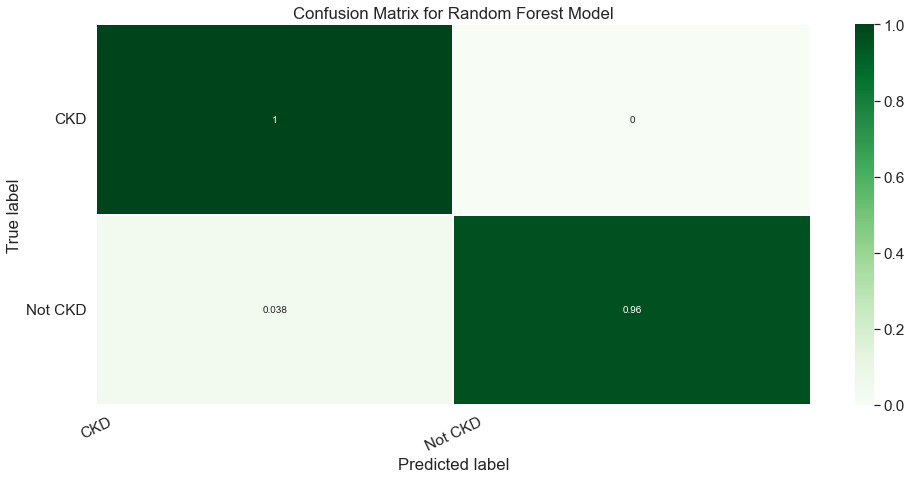

In [33]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['CKD', 'Not CKD']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [34]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 97.5%


In [40]:
import pickle
pickle.dump(model, open('../models/kidney.pkl', 'wb'))

# Suppport Vector Machine

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [36]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [37]:
confusion_matrix(y_test, clf.predict(X_test))

array([[28,  0],
       [ 1, 51]], dtype=int64)

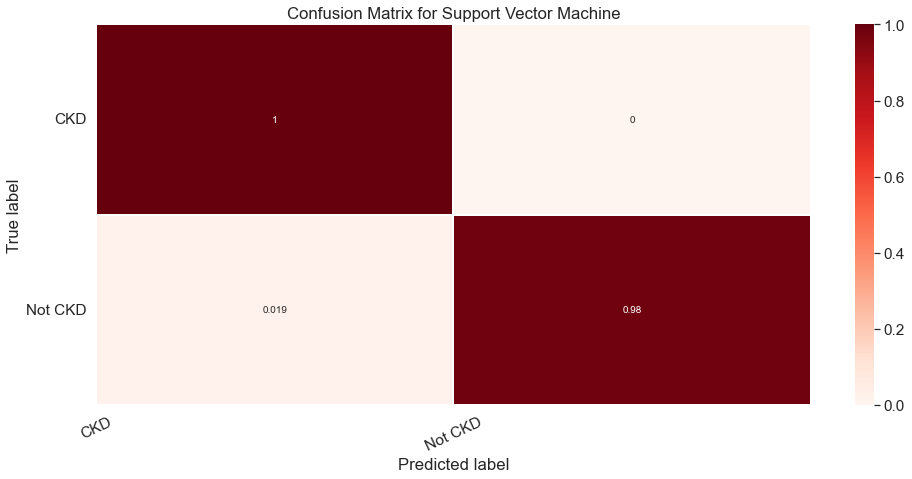

In [40]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, clf.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

# Add labels to the plot
class_names = ['CKD', 'Not CKD']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [42]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 97.5%
